### Import Covid data into a Pandas DataFrame

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-31-2023.csv")

In [4]:
# first, drop useless columns and rename 'Country_Region' to 'Country'
df = df.drop(columns=['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'Combined_Key'])
df = df.rename(columns={'Country_Region':'Country'})
df

,Province_State,Country,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,208545,7882,535.715098,3.779520
1,NaN,Albania,334167,3596,11611.891028,1.076109
2,NaN,Algeria,271378,6881,618.863273,2.535578
3,NaN,Andorra,47839,165,61915.485666,0.344907
4,NaN,Angola,105184,1931,320.036336,1.835831
...,...,...,...,...,...,...
4011,NaN,West Bank and Gaza,703228,5708,13784.956961,0.811686
4012,NaN,Winter Olympics 2022,535,0,NaN,0.000000
4013,NaN,Yemen,11945,2159,40.048994,18.074508
4014,NaN,Zambia,340763,4047,1853.589075,1.187629


In [5]:
# test
france_df = df[df['Country']=='France']
france_df

,Province_State,Country,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
206,French Guiana,France,98028,413,32820.190035,0.421308
207,French Polynesia,France,77957,649,27752.185800,0.832510
208,Guadeloupe,France,201394,1007,50332.519425,0.500015
209,Martinique,France,228512,1089,60893.501925,0.476561
210,Mayotte,France,42002,187,15395.893891,0.445217
211,New Caledonia,France,79956,314,28006.487070,0.392716
212,Reunion,France,493902,919,55165.596644,0.186069
213,Saint Barthelemy,France,5420,6,54830.551340,0.110701
214,Saint Pierre and Miquelon,France,3452,2,59568.593615,0.057937
215,St Martin,France,12233,63,31643.343077,0.515000


### Get total Confirmed and Deaths cases in each country in europe_df

* list of countries in <code>europe_df</code>: <code>['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Belgium']</code>

In [6]:
# making europe_df
condition = df['Country'].isin(['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Belgium'])
europe_df = df[condition]
# same as
# europe_df = df[df['Country'].isin(['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Belgium'])]

In [7]:
# using .groupby()
europe_df.groupby('Country')[['Confirmed', 'Deaths']].sum()

,Confirmed,Deaths
Country,,
Belgium,4691499,33557
France,39729161,165274
Germany,37779833,165711
Italy,25453789,186833
Netherlands,8695133,23704
Spain,13731478,118434
United Kingdom,24507298,220064


In [8]:
# using .pivot_table() : index, values, aggfunc (aggregation function)
europe_grouped = europe_df.pivot_table(index='Country', values=['Confirmed', 'Deaths'], aggfunc = 'sum')
europe_grouped

,Confirmed,Deaths
Country,,
Belgium,4691499,33557
France,39729161,165274
Germany,37779833,165711
Italy,25453789,186833
Netherlands,8695133,23704
Spain,13731478,118434
United Kingdom,24507298,220064


### Step 1: Make a new column : Death_Rate (in percentage)

In [9]:
europe_grouped['Death_Rate'] = europe_grouped['Deaths']/europe_grouped['Confirmed']*100
europe_grouped

,Confirmed,Deaths,Death_Rate
Country,,,
Belgium,4691499,33557,0.715272
France,39729161,165274,0.416002
Germany,37779833,165711,0.438623
Italy,25453789,186833,0.734009
Netherlands,8695133,23704,0.272612
Spain,13731478,118434,0.862500
United Kingdom,24507298,220064,0.897953


### Step 2: Sort values by Deaths in descending order
* which country recorded the highest deaths?

In [10]:
europe_grouped.sort_values(by=['Deaths'], ascending=False)

,Confirmed,Deaths,Death_Rate
Country,,,
United Kingdom,24507298,220064,0.897953
Italy,25453789,186833,0.734009
Germany,37779833,165711,0.438623
France,39729161,165274,0.416002
Spain,13731478,118434,0.862500
Belgium,4691499,33557,0.715272
Netherlands,8695133,23704,0.272612


### Step 3: Sort values by Death_Rate in descending order
* which country recorded the highest death rate?

In [11]:
europe_grouped.sort_values(by=['Death_Rate'], ascending=False)

,Confirmed,Deaths,Death_Rate
Country,,,
United Kingdom,24507298,220064,0.897953
Spain,13731478,118434,0.862500
Italy,25453789,186833,0.734009
Belgium,4691499,33557,0.715272
Germany,37779833,165711,0.438623
France,39729161,165274,0.416002
Netherlands,8695133,23704,0.272612


### Step 4: Make a new column: above_mean_death_rate
* boolean values

In [12]:
# cf. this is not correct global average of death rate
europe_grouped['Death_Rate'].mean()

0.6195672732639288

In [13]:
total_confirmed = europe_grouped['Confirmed'].sum()
total_deaths = europe_grouped['Deaths'].sum()
total_avg_death_rate = total_deaths/total_confirmed*100
print(total_avg_death_rate)

0.5909746366072683


In [14]:
europe_grouped['above_mean_death_rate'] = europe_grouped['Death_Rate']>total_avg_death_rate
europe_grouped

,Confirmed,Deaths,Death_Rate,above_mean_death_rate
Country,,,,
Belgium,4691499,33557,0.715272,True
France,39729161,165274,0.416002,False
Germany,37779833,165711,0.438623,False
Italy,25453789,186833,0.734009,True
Netherlands,8695133,23704,0.272612,False
Spain,13731478,118434,0.862500,True
United Kingdom,24507298,220064,0.897953,True


In [15]:
# we can also use .assign() and lambda
europe_grouped = europe_grouped.assign(above_mean_death_rate=lambda x: x['Death_Rate']>total_avg_death_rate)
europe_grouped

,Confirmed,Deaths,Death_Rate,above_mean_death_rate
Country,,,,
Belgium,4691499,33557,0.715272,True
France,39729161,165274,0.416002,False
Germany,37779833,165711,0.438623,False
Italy,25453789,186833,0.734009,True
Netherlands,8695133,23704,0.272612,False
Spain,13731478,118434,0.862500,True
United Kingdom,24507298,220064,0.897953,True


### Step 5: Make a bar plot using Matplotlib
* 1 fig, 1 axe
* 'Country' on x-axis, 'Death Rate' on y-axis
* make appropriate xlablel, ylabel, title

In [16]:
europe_grouped = europe_grouped.reset_index() 
# same as 
# europe_grouped.reset_index(inplace=True)

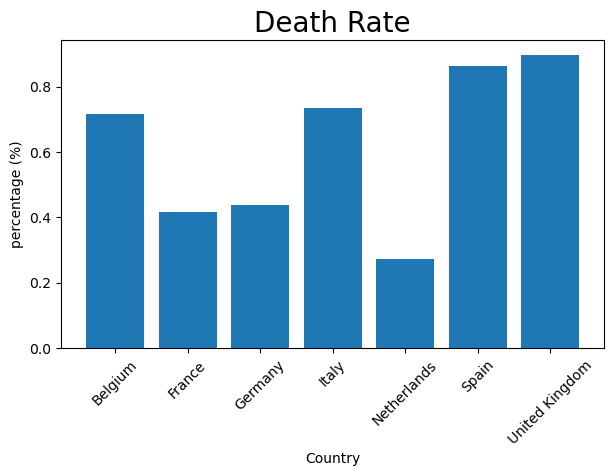

In [17]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(7,4))
ax.bar(europe_grouped['Country'], europe_grouped['Death_Rate'])

ax.set_xlabel("Country")
ax.set_ylabel("percentage (%)")
ax.set_title("Death Rate", fontsize=20)

plt.xticks(rotation=45)
plt.show()

### Step 6: Little upgrade from step 5 - make a bar red if Death_Rate is above average

In [18]:
# cf. zip()
for i, j in zip([1,2,3],['a','b','c']):
    print(i,j)
    print('\n')

1 a


2 b


3 c




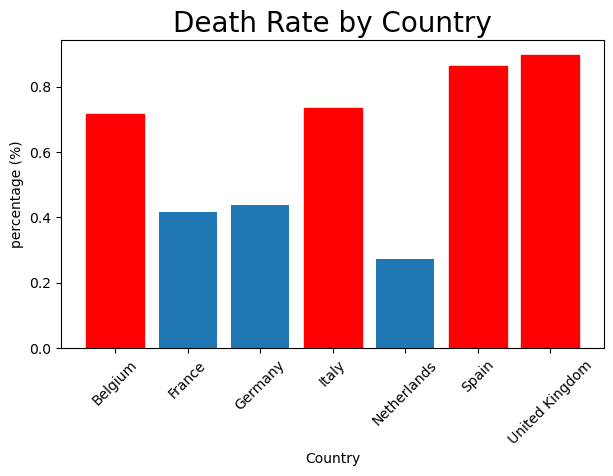

In [19]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(7,4))
vert_bars = ax.bar(europe_grouped['Country'], europe_grouped['Death_Rate'])
for bar, death_rate in zip(vert_bars, europe_grouped['above_mean_death_rate']):
        if death_rate: #if death_rate is above average
            bar.set(color='red')

ax.set_xlabel("Country")
ax.set_ylabel("percentage (%)")
ax.set_title("Death Rate by Country", fontsize=20)

plt.xticks(rotation=45)
plt.show()

### Step 7: Make 3 subplots with 'Country' on x-axis and ' Confirmed', 'Deaths', 'Death Rate' on y-axis
* one fig, 3 axes <code>(nrows=1, ncols=3, figsize=(15,5))</code>
* make appropriate xlabel, ylabel, title
* you can use <code>.tight_layout()</code>

In [20]:
def set_axes(ax, ylabel, title):
    ax.set_xlabel('Country')
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelrotation=45)

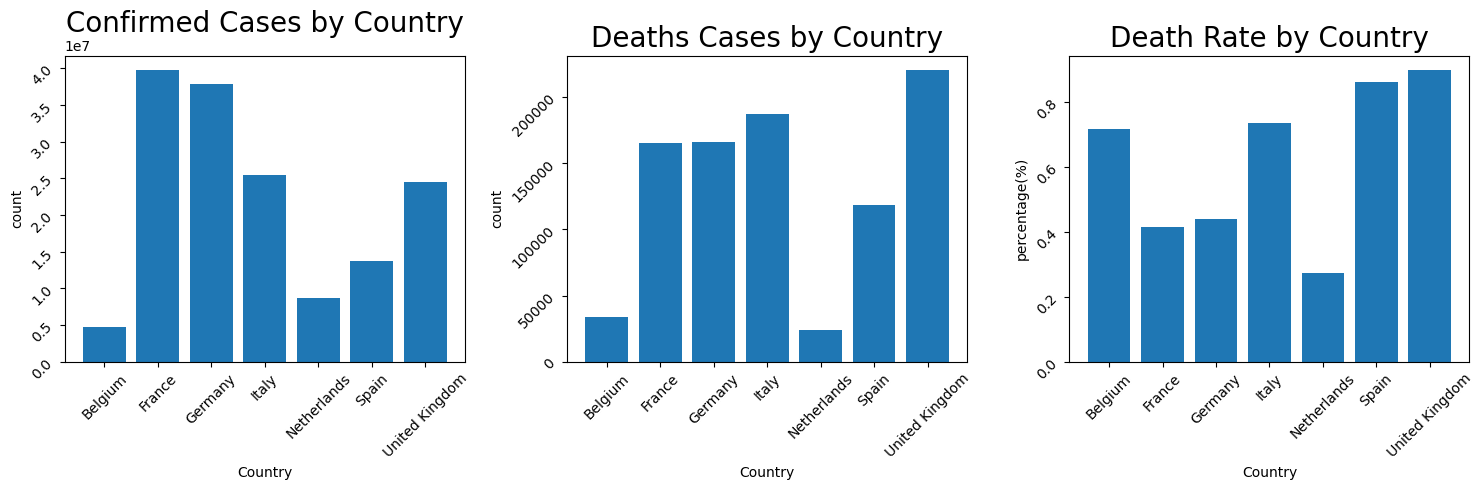

In [21]:
fig,(ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.bar(europe_grouped['Country'], europe_grouped['Confirmed'])
set_axes(ax1, 'count', 'Confirmed Cases by Country')

ax2.bar(europe_grouped['Country'], europe_grouped['Deaths'])
set_axes(ax2, 'count', 'Deaths Cases by Country')

ax3.bar(europe_grouped['Country'], europe_grouped['Death_Rate'])
set_axes(ax3, 'percentage(%)', 'Death Rate by Country')


plt.tight_layout()
plt.show()

### Step 8: Make a bar graph with additional y-axis lable for 'Deaths' using matplotlib.pyplot
<code><br/>fig,ax1 = plt.subplots()<br/>ax2 = ax1.twinx()</code>

In [22]:
europe_grouped.set_index('Country', inplace=True)
europe_grouped

,Confirmed,Deaths,Death_Rate,above_mean_death_rate
Country,,,,
Belgium,4691499,33557,0.715272,True
France,39729161,165274,0.416002,False
Germany,37779833,165711,0.438623,False
Italy,25453789,186833,0.734009,True
Netherlands,8695133,23704,0.272612,False
Spain,13731478,118434,0.862500,True
United Kingdom,24507298,220064,0.897953,True


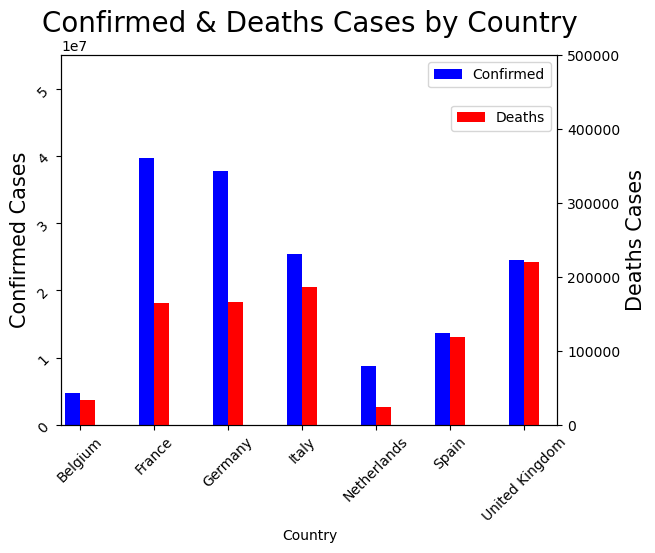

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #create another axes that shares the same x-axis as ax1

width = 0.2
europe_grouped['Confirmed'].plot(kind='bar', color='blue', ax=ax1, width = width, position=1, ylim=(0, 55000000))
europe_grouped['Deaths'].plot(kind='bar', color='red', ax=ax2, width = width, position=0, ylim=(0,500000))

ax1.set_title("Confirmed & Deaths Cases by Country", fontsize = 20)
ax1.set_ylabel('Confirmed Cases', fontsize = 15)
ax2.set_ylabel('Deaths Cases', fontsize = 15)

ax1.legend(loc='upper right')
ax2.legend(loc='center right', bbox_to_anchor=(0.5, 0.58, 0.5, 0.5))

ax1.tick_params(labelrotation=45)
plt.show()

### Step 9: Plotting timeseries

In [24]:
global_confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
france_confirmed_timeseries = global_confirmed_df[global_confirmed_df['Country/Region']=='France'].drop(columns=['Lat','Long'])
france_confirmed_timeseries = france_confirmed_timeseries.groupby('Country/Region').sum().T
france_confirmed_timeseries.rename(columns={'France':'Confirmed'},inplace=True)

global_deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
france_deaths_timeseries = global_deaths_df[global_deaths_df['Country/Region']=='France'].drop(columns=['Lat','Long'])
france_deaths_timeseries = france_deaths_timeseries.groupby('Country/Region').sum().T
france_deaths_timeseries.rename(columns={'France':'Deaths'}, inplace=True)

/var/folders/mz/9dfmz8nj5jn_gj4_297mdych0000gn/T/ipykernel_2846/2508519676.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  france_confirmed_timeseries = france_confirmed_timeseries.groupby('Country/Region').sum().T
/var/folders/mz/9dfmz8nj5jn_gj4_297mdych0000gn/T/ipykernel_2846/2508519676.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  france_deaths_timeseries = france_deaths_timeseries.groupby('Country/Region').sum().T


In [25]:
france_timeseries = france_confirmed_timeseries.join(france_deaths_timeseries)
france_timeseries

Country/Region,Confirmed,Deaths
1/22/20,0,0
1/23/20,0,0
1/24/20,2,0
1/25/20,3,0
1/26/20,3,0
...,...,...
3/5/23,39839090,166071
3/6/23,39847236,166114
3/7/23,39854299,166138
3/8/23,39860410,166165


<Axes: >

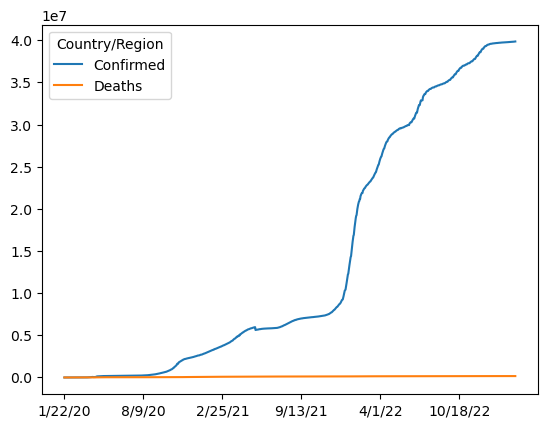

In [26]:
# cf. make this so much better! :)
france_timeseries.plot()